# Conexion 

In [192]:
# Importa las bibliotecas necesarias
import pandas as pd
import psycopg2

In [193]:
# Crea una conexión con la base de datos
conn = psycopg2.connect(
    host="localhost", # reemplaza con tu servidor si no es local
    database="vianev_menores3_2017_2018",
    user="postgres", 
    password="p1234"
)

In [120]:
query = 'select conglome, vivienda, id, altitud, sexo, departamento, provincia, distrito, res_peso, res_talla, res_hb, res_final from schema_nutri.general_001'

In [121]:
data_001 = pd.read_sql_query(query, conn)

C:\Users\RyanO\AppData\Local\Temp\ipykernel_23040\3653845659.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_001 = pd.read_sql_query(query, conn)


In [122]:
data_001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   conglome      713 non-null    int64 
 1   vivienda      713 non-null    int64 
 2   id            713 non-null    object
 3   altitud       713 non-null    int64 
 4   sexo          713 non-null    int64 
 5   departamento  713 non-null    object
 6   provincia     713 non-null    object
 7   distrito      713 non-null    object
 8   res_peso      713 non-null    int64 
 9   res_talla     713 non-null    int64 
 10  res_hb        713 non-null    int64 
 11  res_final     713 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 67.0+ KB


# Analisis exploratorio

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

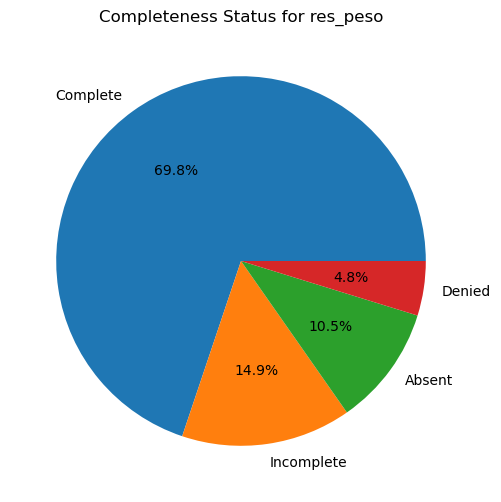

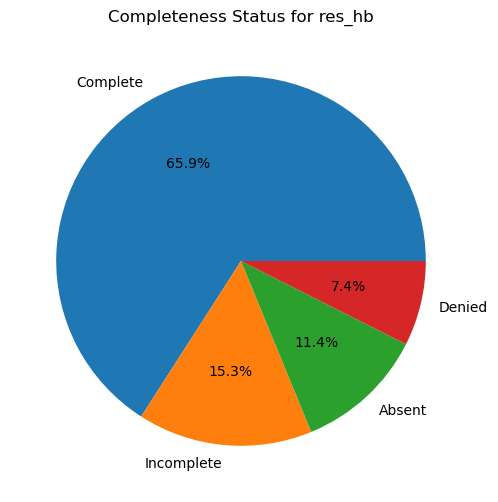

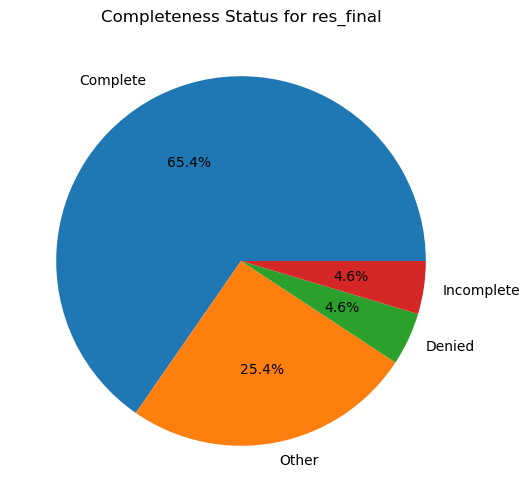

In [124]:
# Define a function to create pie charts for the RES_* columns
def create_pie_chart(column_name):
    # Get the counts of each status
    status_counts = data_001[column_name].value_counts()
    
    # Define the status labels
    status_labels = {
        1: 'Complete',
        2: 'Incomplete',
        3: 'Denied',
        4: 'Absent',
        5: 'Interview not started',
        6: 'Other'
    }
    
    # Get the labels for the present statuses
    present_labels = [status_labels[code] for code in status_counts.index]
    
    # Create the pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(status_counts, labels=present_labels, autopct='%1.1f%%')
    plt.title(f'Completeness Status for {column_name}')
    plt.show()

# Create pie charts for RES_PESO, RES_HB, and RES_FINAL
create_pie_chart('res_peso')
create_pie_chart('res_hb')
create_pie_chart('res_final')


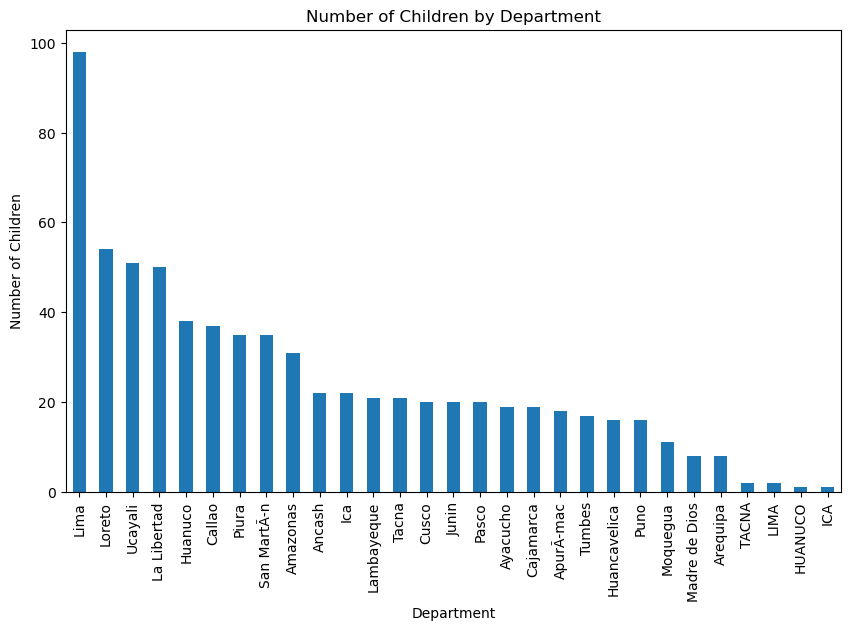

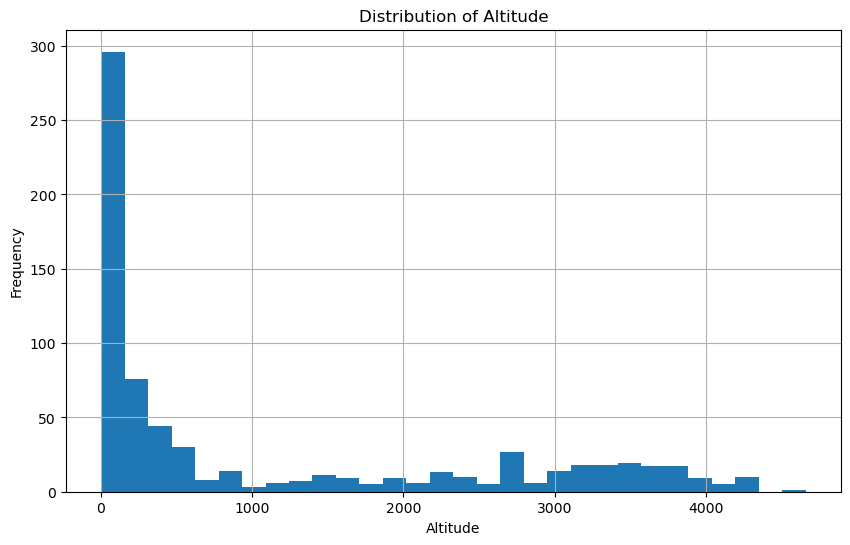

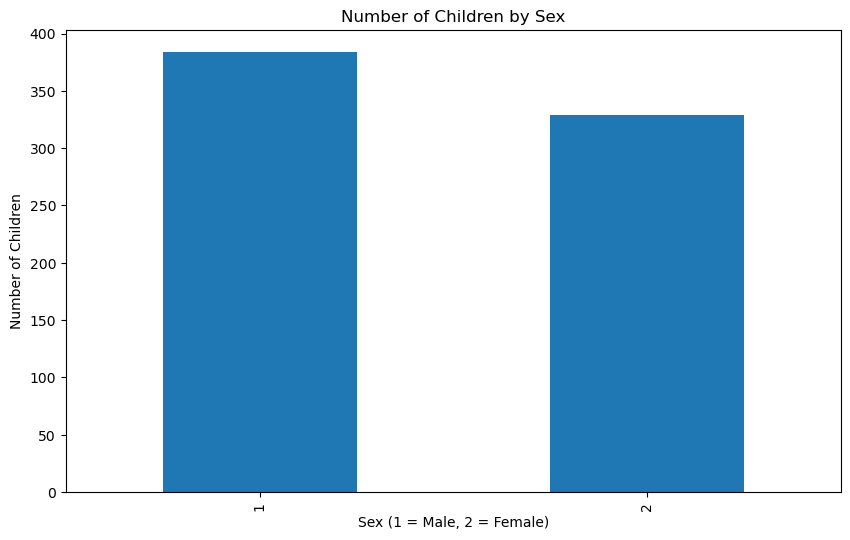

In [125]:
# Bar plot of the number of children by DEPARTAMENTO
plt.figure(figsize=(10, 6))
data_001['departamento'].value_counts().plot(kind='bar')
plt.title('Number of Children by Department')
plt.xlabel('Department')
plt.ylabel('Number of Children')
plt.show()

# Histogram of ALTITUD
plt.figure(figsize=(10, 6))
data_001['altitud'].hist(bins=30)
plt.title('Distribution of Altitude')
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.show()

# Bar plot of the number of children by SEXO
plt.figure(figsize=(10, 6))
data_001['sexo'].value_counts().plot(kind='bar')
plt.title('Number of Children by Sex')
plt.xlabel('Sex (1 = Male, 2 = Female)')
plt.ylabel('Number of Children')
plt.show()


## Factor

In [126]:
query2 = 'select conglome, vivienda, id, dominio, departamento, provincia, distrito  from schema_nutri.factor_zona'

In [127]:
data_factor = pd.read_sql_query(query2, conn)

C:\Users\RyanO\AppData\Local\Temp\ipykernel_23040\223541683.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_factor = pd.read_sql_query(query2, conn)


In [128]:
data_factor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   conglome      461 non-null    int64 
 1   vivienda      461 non-null    int64 
 2   id            461 non-null    object
 3   dominio       461 non-null    object
 4   departamento  461 non-null    object
 5   provincia     461 non-null    object
 6   distrito      461 non-null    object
dtypes: int64(2), object(5)
memory usage: 25.3+ KB


In [129]:
# Merge the two dataframes on CONGLOME, VIVIENDA, and ID
merged_data = pd.merge(data_001, data_factor, on=['conglome', 'vivienda', 'id'])

# Check the first few rows of the merged dataframe
merged_data.head()


,conglome,vivienda,id,altitud,sexo,departamento_x,provincia_x,distrito_x,res_peso,res_talla,res_hb,res_final,dominio,departamento_y,provincia_y,distrito_y
0,5345,4,3.0,2581,2,ApurÃ­mac,ABANCAY,TAMBURCO,1,1,1,1,Resto urbano,APURÍMAC,ABANCAY,TAMBURCO
1,5351,1,6.0,2378,2,ApurÃ­mac,ABANCAY,ABANCAY,1,1,1,1,Resto urbano,APURÍMAC,ABANCAY,ABANCAY
2,5384,6,7.0,3075,1,ApurÃ­mac,CHINCHEROS,HUACCANA,1,1,1,1,Rural,APURÍMAC,CHINCHEROS,HUACCANA
3,6028,7,3.0,21,2,Callao,CALLAO,VENTANILLA,1,1,1,1,Lima metropolitana,CALLAO,PROV. CONST. DEL CALLAO,VENTANILLA
4,6064,1,4.0,21,1,Callao,CALLAO,VENTANILLA,1,1,1,1,Lima metropolitana,CALLAO,PROV. CONST. DEL CALLAO,VENTANILLA


In [130]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   conglome        461 non-null    int64 
 1   vivienda        461 non-null    int64 
 2   id              461 non-null    object
 3   altitud         461 non-null    int64 
 4   sexo            461 non-null    int64 
 5   departamento_x  461 non-null    object
 6   provincia_x     461 non-null    object
 7   distrito_x      461 non-null    object
 8   res_peso        461 non-null    int64 
 9   res_talla       461 non-null    int64 
 10  res_hb          461 non-null    int64 
 11  res_final       461 non-null    int64 
 12  dominio         461 non-null    object
 13  departamento_y  461 non-null    object
 14  provincia_y     461 non-null    object
 15  distrito_y      461 non-null    object
dtypes: int64(8), object(8)
memory usage: 61.2+ KB


In [131]:
columnas_a_eliminar = ['departamento_y', 'provincia_y', 'distrito_y']
merged_data= merged_data.drop(columnas_a_eliminar, axis=1)

In [132]:
merged_data['pais'] = 'Peru'

In [133]:
merged_data['id'] = merged_data['id'].astype(float)

In [134]:
merged_data['id'] = merged_data['id'].astype(int)

In [135]:
merged_data['index_'] = merged_data['conglome'].astype(str) + '_' + merged_data['vivienda'].astype(str) + '_' + merged_data['id'].astype(str)

In [136]:
# Define a function to classify each row as 'Urbano' or 'Rural'
def classify_area_type(row):
    if 'urbano' in row or 'Lima metropolitana' in row:
        return 'Urbano'
    else:
        return 'Rural'

# Apply the function to the 'DOMINIO' column
merged_data['Area_Type'] = merged_data['dominio'].apply(classify_area_type)


In [137]:
merged_data.value_counts('index_')

index_
10012_63_7     1
8311_102_9     1
8307_39_99     1
8307_39_6      1
8307_114_7     1
              ..
6569_127_99    1
6546_36_6      1
6546_23_5      1
6507_44_3      1
9827_29_5      1
Length: 461, dtype: int64

In [138]:
#Create the table of conglomerates

# Get the number of evaluated children in each conglomerate
num_evaluated = merged_data['Area_Type'].value_counts()

# Get the number of children in urban and rural areas
num_urban = num_evaluated.loc[num_evaluated.index.str.contains('Urbano')].sum() 
num_rural = num_evaluated.loc[num_evaluated.index.str.contains('Rural')].sum()

# Get the total number of children
num_total = num_evaluated.sum()

# Create the table
conglomerate_table = pd.DataFrame({
    'Urban': num_urban,
    'Rural': num_rural,
    'Total': num_total
}, index=['Number of Evaluated Children'])

conglomerate_table


,Urban,Rural,Total
Number of Evaluated Children,249,212,461


In [139]:
merged_data.departamento_x.value_counts()

Lima             61
Loreto           42
La Libertad      35
Ucayali          31
San MartÃ­n      29
Piura            24
Huanuco          23
Callao           23
Amazonas         21
Ica              18
Lambayeque       16
Cusco            14
Ayacucho         13
Ancash           13
Junin            12
Tacna            11
Huancavelica     11
ApurÃ­mac        11
Cajamarca        10
Pasco            10
Tumbes            8
Arequipa          7
Puno              7
Moquegua          5
Madre de Dios     4
HUANUCO           1
ICA               1
Name: departamento_x, dtype: int64

- Quitar el y.

In [140]:
merged_data.departamento_x = merged_data.departamento_x.str.capitalize()

In [141]:
merged_data.departamento_x.value_counts()

Lima             61
Loreto           42
La libertad      35
Ucayali          31
San martã­n      29
Huanuco          24
Piura            24
Callao           23
Amazonas         21
Ica              19
Lambayeque       16
Cusco            14
Ancash           13
Ayacucho         13
Junin            12
Apurã­mac        11
Huancavelica     11
Tacna            11
Cajamarca        10
Pasco            10
Tumbes            8
Arequipa          7
Puno              7
Moquegua          5
Madre de dios     4
Name: departamento_x, dtype: int64

In [142]:
merged_data.provincia_x.value_counts()

LIMA                      47
CALLAO                    25
MAYNAS                    22
TRUJILLO                  16
PADRE ABAD                13
                          ..
DANIEL ALCIDES CARRION     1
PAITA                      1
PUNO                       1
PICOTA                     1
CONTRALMIRANTE VILLAR      1
Name: provincia_x, Length: 111, dtype: int64

In [143]:
merged_data.distrito_x.value_counts()

VENTANILLA                14
SAN JUAN DE LURIGANCHO    10
CALLERIA                   8
COMAS                      7
RIO SANTIAGO               7
                          ..
FLORENCIA DE MORA          1
HUANCAYO                   1
EL CARMEN                  1
MARCONA                    1
PACHIZA                    1
Name: distrito_x, Length: 222, dtype: int64

<Figure size 1400x800 with 0 Axes>

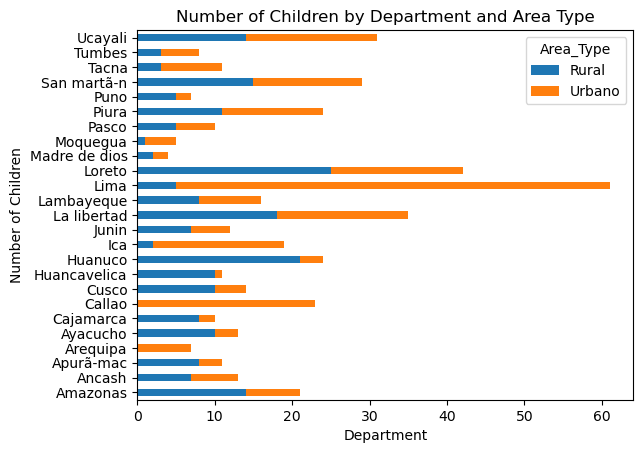

In [144]:
# Bar plot of the number of children by DEPARTAMENTO split by DOMINIO
plt.figure(figsize=(14, 8))
merged_data.groupby(['departamento_x', 'Area_Type']).size().unstack().plot(kind='barh', stacked=True)
plt.title('Number of Children by Department and Area Type')
plt.xlabel('Department')
plt.ylabel('Number of Children')
plt.show()


### Observaciones

- La mezcla de merged data es 001 y factor

- No Habian nas

- 461 es el numero de filas de factor que se tuvo en comun con factor (hay data perdida sin factor de los datos generales)

- Los cambios fueron en uniformizacion de departamento (capitalize)

- Tambien se junto urbano con lima metropolitana en domia con 'Area Type'

- El csv pero esos graficos previos estan listos.

In [145]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   conglome        461 non-null    int64 
 1   vivienda        461 non-null    int64 
 2   id              461 non-null    int32 
 3   altitud         461 non-null    int64 
 4   sexo            461 non-null    int64 
 5   departamento_x  461 non-null    object
 6   provincia_x     461 non-null    object
 7   distrito_x      461 non-null    object
 8   res_peso        461 non-null    int64 
 9   res_talla       461 non-null    int64 
 10  res_hb          461 non-null    int64 
 11  res_final       461 non-null    int64 
 12  dominio         461 non-null    object
 13  pais            461 non-null    object
 14  index_          461 non-null    object
 15  Area_Type       461 non-null    object
dtypes: int32(1), int64(8), object(7)
memory usage: 59.4+ KB


In [146]:
merged_data.sexo = merged_data.sexo.replace({1: 'Masculino', 2: 'Femenino'})

In [158]:
merged_data

,conglome,vivienda,id,altitud,sexo,departamento_x,provincia_x,distrito_x,res_peso,res_talla,res_hb,res_final,dominio,pais,index_,Area_Type
0,5345,4,3,2581,Femenino,Apurã­mac,ABANCAY,TAMBURCO,1,1,1,1,Resto urbano,Peru,5345_4_3,Urbano
1,5351,1,6,2378,Femenino,Apurã­mac,ABANCAY,ABANCAY,1,1,1,1,Resto urbano,Peru,5351_1_6,Urbano
2,5384,6,7,3075,Masculino,Apurã­mac,CHINCHEROS,HUACCANA,1,1,1,1,Rural,Peru,5384_6_7,Rural
3,6028,7,3,21,Femenino,Callao,CALLAO,VENTANILLA,1,1,1,1,Lima metropolitana,Peru,6028_7_3,Urbano
4,6064,1,4,21,Masculino,Callao,CALLAO,VENTANILLA,1,1,1,1,Lima metropolitana,Peru,6064_1_4,Urbano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,9719,109,99,450,Femenino,Ucayali,ATALAYA,RAYMONDI,1,1,1,1,Resto urbano,Peru,9719_109_99,Urbano
457,10122,114,11,41,Femenino,Ica,CHINCHA,CHINCHA ALTA,1,1,1,1,Resto urbano,Peru,10122_114_11,Urbano
458,10183,117,99,72,Femenino,La libertad,CHEPEN,PUEBLO NUEVO,1,1,1,1,Rural,Peru,10183_117_99,Rural
459,10262,161,99,12,Femenino,Lima,HUAURA,VEGUETA,1,1,1,1,Rural,Peru,10262_161_99,Rural


In [159]:
merged_data.provincia_x = merged_data.provincia_x.str.capitalize()

In [161]:
merged_data.distrito_x = merged_data.distrito_x.str.capitalize()

In [162]:
merged_data.head(2)

,conglome,vivienda,id,altitud,sexo,departamento_x,provincia_x,distrito_x,res_peso,res_talla,res_hb,res_final,dominio,pais,index_,Area_Type
0,5345,4,3,2581,Femenino,Apurã­mac,Abancay,Tamburco,1,1,1,1,Resto urbano,Peru,5345_4_3,Urbano
1,5351,1,6,2378,Femenino,Apurã­mac,Abancay,Abancay,1,1,1,1,Resto urbano,Peru,5351_1_6,Urbano


In [166]:
merged_data.departamento_x.unique()

array(['Apurã\xadmac', 'Callao', 'Cusco', 'Huanuco', 'Ica', 'Junin',
       'La libertad', 'Lambayeque', 'Lima', 'Madre de dios', 'Piura',
       'San martã\xadn', 'Tumbes', 'Ucayali', 'Amazonas', 'Ancash',
       'Arequipa', 'Ayacucho', 'Cajamarca', 'Huancavelica', 'Loreto',
       'Moquegua', 'Pasco', 'Puno', 'Tacna'], dtype=object)

In [167]:
merged_data.departamento_x = merged_data.departamento_x.replace({'Apurã\xadmac': 'Apurimac', 'San martã\xadn': 'San Martin'})

In [169]:
merged_data.provincia_x.unique()

array(['Abancay', 'Chincheros', 'Callao', 'Calca', 'Puerto inca', 'Ica',
       'Huancayo', 'Satipo', 'Trujillo', 'Chiclayo', 'Lima', 'Tambopata',
       'Piura', 'Lamas', 'Rioja', 'Picota', 'Zarumilla', 'Atalaya',
       'Coronel portillo', 'Chanchamayo', 'Chachapoyas', 'Condorcanqui',
       'Bagua', 'Luya', 'Utcubamba', 'Santa', 'Casma', 'Huaraz', 'Sihuas',
       'Yungay', 'Andahuaylas', 'Arequipa', 'Huamanga',
       'Paucar del sara sara', 'Huanta', 'Cajamarca', 'Hualgayoc', 'Jaen',
       'Chota', 'San miguel', 'Chumbivilcas', 'Canchis', 'Anta',
       'Quispicanchi', 'Espinar', 'Huancavelica', 'Tayacaja', 'Churcampa',
       'Acobamba', 'Angaraes', 'Huanuco', 'Leoncio prado', 'Maraã‘on',
       'Dos de mayo', 'Pachitea', 'Chincha', 'Pisco', 'Nazca', 'Jauja',
       'Pacasmayo', 'Otuzco', 'Santiago de chuco', 'Lambayeque',
       'Barranca', 'Huaura', 'Caã‘ete', 'Huaral', 'Maynas',
       'Alto amazonas', 'Ucayali', 'Loreto', 'Mariscal ramon castilla',
       'Tahuamanu', 'Maris

In [170]:
merged_data.provincia_x = merged_data.provincia_x.replace({'Datem del maraã‘on': 'Datem del maranon', 'Caã‘ete': 'Canete', 'Maraã‘on':'Maranon'})

In [171]:
merged_data.distrito_x.unique()

array(['Tamburco', 'Abancay', 'Huaccana', 'Ventanilla', 'Lares',
       'Tournavista', 'Ica', 'Salas', 'Sicaya', 'Coviriali', 'Trujillo',
       'Jose leonardo ortiz', 'Independencia', 'San juan de lurigancho',
       'Tambopata', 'La union', 'Lamas', 'Pardo miguel', 'Picota',
       'Matapalo', 'Raymondi', 'Iparia', 'Pichanaqui', 'Chachapoyas',
       'Nieva', 'Bagua', 'Camporredondo', 'Rio santiago', 'Cajaruro',
       'Ocalli', 'Ocumal', 'La jalca', 'Chimbote', 'Yautan', 'Huaraz',
       'San juan', 'Quillo', 'Pampachiri', 'Cerro colorado', 'Arequipa',
       'Paucarpata', 'Socabaya', 'Uchumayo', 'Jesus nazareno', 'Pausa',
       'Sivia', 'Los baã‘os del inca', 'Bambamarca', 'Bellavista',
       'Chimban', 'La florida', 'Mi peru', 'Callao', 'Santo tomas',
       'Pitumarca', 'Andaraes', 'Ancahuasi', 'Quiquijana', 'Pallpata',
       'Huancavelica', 'Tintay puncu', 'San pedro de coris', 'Rosario',
       'Nuevo occoro', 'Congalla', 'Huanuco', 'Rupa - rupa', 'Cholon',
       'Hermilio 

In [172]:
merged_data.distito_x = merged_data.distrito_x.replace({'Breã‘a': 'Brena', 'Los baã‘os del inca': 'Los banos del inca', 'Ichuã‘a':'Ichuna'})

C:\Users\RyanO\AppData\Local\Temp\ipykernel_23040\154199942.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  merged_data.distito_x = merged_data.distrito_x.replace({'Breã‘a': 'Brena', 'Los baã‘os del inca': 'Los banos del inca', 'Ichuã‘a':'Ichuna'})


In [185]:
merged_data = merged_data.reset_index()

In [178]:
merged_data.drop(columns='dominio', axis=1, inplace=True)

In [186]:
merged_data

,index_,conglome,vivienda,id,altitud,sexo,departamento_x,provincia_x,distrito_x,res_peso,res_talla,res_hb,res_final,pais,Area_Type
0,5345_4_3,5345,4,3,2581,Femenino,Apurimac,Abancay,Tamburco,1,1,1,1,Peru,Urbano
1,5351_1_6,5351,1,6,2378,Femenino,Apurimac,Abancay,Abancay,1,1,1,1,Peru,Urbano
2,5384_6_7,5384,6,7,3075,Masculino,Apurimac,Chincheros,Huaccana,1,1,1,1,Peru,Rural
3,6028_7_3,6028,7,3,21,Femenino,Callao,Callao,Ventanilla,1,1,1,1,Peru,Urbano
4,6064_1_4,6064,1,4,21,Masculino,Callao,Callao,Ventanilla,1,1,1,1,Peru,Urbano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,9719_109_99,9719,109,99,450,Femenino,Ucayali,Atalaya,Raymondi,1,1,1,1,Peru,Urbano
457,10122_114_11,10122,114,11,41,Femenino,Ica,Chincha,Chincha alta,1,1,1,1,Peru,Urbano
458,10183_117_99,10183,117,99,72,Femenino,La libertad,Chepen,Pueblo nuevo,1,1,1,1,Peru,Rural
459,10262_161_99,10262,161,99,12,Femenino,Lima,Huaura,Vegueta,1,1,1,1,Peru,Rural


In [187]:
needed_columns = ['index_', 'altitud', 'sexo', 'departamento_x', 'provincia_x', 'distrito_x', 'res_peso',	'res_talla','res_hb',	'res_final',	'pais',	'Area_Type'] 

In [188]:
clean_merged_gen_fact = merged_data[needed_columns]
clean_merged_gen_fact

,index_,altitud,sexo,departamento_x,provincia_x,distrito_x,res_peso,res_talla,res_hb,res_final,pais,Area_Type
0,5345_4_3,2581,Femenino,Apurimac,Abancay,Tamburco,1,1,1,1,Peru,Urbano
1,5351_1_6,2378,Femenino,Apurimac,Abancay,Abancay,1,1,1,1,Peru,Urbano
2,5384_6_7,3075,Masculino,Apurimac,Chincheros,Huaccana,1,1,1,1,Peru,Rural
3,6028_7_3,21,Femenino,Callao,Callao,Ventanilla,1,1,1,1,Peru,Urbano
4,6064_1_4,21,Masculino,Callao,Callao,Ventanilla,1,1,1,1,Peru,Urbano
...,...,...,...,...,...,...,...,...,...,...,...,...
456,9719_109_99,450,Femenino,Ucayali,Atalaya,Raymondi,1,1,1,1,Peru,Urbano
457,10122_114_11,41,Femenino,Ica,Chincha,Chincha alta,1,1,1,1,Peru,Urbano
458,10183_117_99,72,Femenino,La libertad,Chepen,Pueblo nuevo,1,1,1,1,Peru,Rural
459,10262_161_99,12,Femenino,Lima,Huaura,Vegueta,1,1,1,1,Peru,Rural


In [ ]:
clean_merged_gen_fact.to_csv('clean_data/clean_data_mergerd_gen_factor.csv', index=False)

## NECESIDADES_100 DATA CLEANING


In [196]:
query_necesidad = 'select * from schema_nutri.necesidades_100'

In [197]:
data_necesidad = pd.read_sql_query(query_necesidad, conn)

C:\Users\RyanO\AppData\Local\Temp\ipykernel_23040\2693263261.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_necesidad = pd.read_sql_query(query_necesidad, conn)


In [220]:
data_necesidad.iloc[:,5:]

,p106,p107,p108,p109,p110,p111,p112,p113_bicicleta,p113_motocicleta,p113_carro,...,p112_radio,p112_televisor,p112_computadora,p112_horno,p112_lavadora,p112_refrigeradora,p112_cocina,p112_plancha,p112_equipo,index_
0,2,1,1,1,2,2,27,2,2,1,...,2,1,2,2,2,2,1,2,2,5345_4_3
1,5,1,4,3,6,2,129,2,1,2,...,1,1,2,2,2,2,2,2,1,5384_6_7
2,5,1,1,1,2,2,257,2,2,2,...,2,1,2,2,1,2,1,2,2,6064_1_4
3,4,1,2,1,6,2,12,2,2,2,...,1,1,2,2,2,2,2,2,2,6287_3_3
4,5,7,3,2,6,23,12,2,2,2,...,1,1,2,2,2,2,2,2,2,6643_6_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,1,1,5,3,3,2,1235678,2,2,2,...,1,1,1,2,1,1,1,1,2,7541_123_99
310,4,1,3,2,2,2,7,2,1,2,...,2,2,2,2,2,2,1,2,2,9040_138_99
311,5,1,2,1,2,23,12678,2,2,2,...,1,1,2,2,2,1,1,1,2,9719_109_99
312,1,1,7,5,2,2,278,2,2,2,...,2,1,2,2,2,2,1,1,2,10122_114_11


In [202]:
data_necesidad['index_'] = data_necesidad['conglome'].astype(str) + '_' + data_necesidad['vivienda'].astype(str) + '_' + data_necesidad['id'].astype(float).astype(int).astype(str)


In [205]:
data_necesidad.drop(columns={'conglome', 'vivienda', 'id'}, axis=1, inplace=True)

In [208]:
data_necesidad.columns

Index(['p101', 'p102', 'p103', 'p104', 'p105', 'p106', 'p107', 'p108', 'p109',
       'p110', 'p111', 'p112', 'p113_bicicleta', 'p113_motocicleta',
       'p113_carro', 'p113_otro', 'p111_tel_fijo', 'p111_tel_celular',
       'p111_cable', 'p111_internet', 'p112_radio', 'p112_televisor',
       'p112_computadora', 'p112_horno', 'p112_lavadora', 'p112_refrigeradora',
       'p112_cocina', 'p112_plancha', 'p112_equipo', 'index_'],
      dtype='object')

In [215]:
data_necesidad.p113_bicicleta.unique()

array([2, 1], dtype=int64)

In [243]:
needed_columns = ['index_','p113_bicicleta','p113_motocicleta','p113_carro','p113_otro','p111_tel_fijo','p111_tel_celular','p111_cable','p111_internet','p112_radio','p112_televisor','p112_computadora','p112_horno','p112_lavadora','p112_refrigeradora','p112_cocina','p112_plancha','p112_equipo'] 


In [244]:
clean_data_necesidad = data_necesidad[needed_columns]
clean_data_necesidad

,index_,p113_bicicleta,p113_motocicleta,p113_carro,p113_otro,p111_tel_fijo,p111_tel_celular,p111_cable,p111_internet,p112_radio,p112_televisor,p112_computadora,p112_horno,p112_lavadora,p112_refrigeradora,p112_cocina,p112_plancha,p112_equipo
0,5345_4_3,2,2,1,2,2,1,2,2,2,1,2,2,2,2,1,2,2
1,5384_6_7,2,1,2,1,2,1,2,2,1,1,2,2,2,2,2,2,1
2,6064_1_4,2,2,2,2,2,1,2,2,2,1,2,2,1,2,1,2,2
3,6287_3_3,2,2,2,2,2,1,2,2,1,1,2,2,2,2,2,2,2
4,6643_6_5,2,2,2,1,2,1,1,2,1,1,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,7541_123_99,2,2,2,2,2,1,2,2,1,1,1,2,1,1,1,1,2
310,9040_138_99,2,1,2,2,2,1,2,2,2,2,2,2,2,2,1,2,2
311,9719_109_99,2,2,2,1,2,1,1,2,1,1,2,2,2,1,1,1,2
312,10122_114_11,2,2,2,2,2,1,2,2,2,1,2,2,2,2,1,1,2


In [292]:
lista = ['p113_bicicleta','p113_motocicleta','p113_carro','p113_otro','p111_tel_fijo','p111_tel_celular','p111_cable','p111_internet','p112_radio','p112_televisor','p112_computadora','p112_horno','p112_lavadora','p112_refrigeradora','p112_cocina','p112_plancha','p112_equipo']
len(lista)

17

In [323]:
clean_data_necesidad=clean_data_necesidad.replace([1,0],['Si','No'])

In [289]:
clean_data_necesidad


,index_,p113_bicicleta,p113_motocicleta,p113_carro,p113_otro,p111_tel_fijo,p111_tel_celular,p111_cable,p111_internet,p112_radio,p112_televisor,p112_computadora,p112_horno,p112_lavadora,p112_refrigeradora,p112_cocina,p112_plancha,p112_equipo
0,5345_4_3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,5384_6_7,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1
2,6064_1_4,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
3,6287_3_3,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
4,6643_6_5,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,7541_123_99,0,0,0,0,0,1,0,0,1,1,1,0,1,1,1,1,0
310,9040_138_99,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
311,9719_109_99,0,0,0,1,0,1,1,0,1,1,0,0,0,1,1,1,0
312,10122_114_11,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0


In [319]:
clean_data_necesidad['CumpleNecesidad'] = -1


In [320]:
clean_data_necesidad['CumpleNecesidad'] = 0
for i in range(len(clean_data_necesidad)):
    value = sum(clean_data_necesidad.iloc[i,1:])
    if(value >= 9):
        clean_data_necesidad.iloc[i,-1] = 1
    else:
        clean_data_necesidad.iloc[i,-1] = 0

In [318]:
#clean_data_necesidad.drop(columns='CumpleNecesidad',axis=1,inplace=True)

In [331]:
clean_data_necesidad.to_csv('csv_tableau/clean_data_necesidad.csv', index=False)

## CAP 300 A ANEMIAY 300 SUPLEMENTOS


In [149]:
query3 = 'select conglome, vivienda, id, P314_CONSUME_SUPL  from schema_nutri.suplementos_300'

In [150]:
data_suplementos = pd.read_sql_query(query3, conn)

C:\Users\RyanO\AppData\Local\Temp\ipykernel_23040\2668608282.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_suplementos = pd.read_sql_query(query3, conn)


In [151]:
data_suplementos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   conglome           274 non-null    int64 
 1   vivienda           274 non-null    int64 
 2   id                 274 non-null    object
 3   p314_consume_supl  274 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 8.7+ KB


In [152]:
query4 = 'select conglome, vivienda, id, P307 from schema_nutri.anemia_300'

In [153]:
data_anemia = pd.read_sql_query(query4, conn)

C:\Users\RyanO\AppData\Local\Temp\ipykernel_23040\584411509.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_anemia = pd.read_sql_query(query4, conn)


In [154]:
data_anemia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   conglome  495 non-null    int64 
 1   vivienda  495 non-null    int64 
 2   id        495 non-null    object
 3   p307      495 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.6+ KB


In [155]:
# Merge the supplement and anemia dataframes on CONGLOME, VIVIENDA, and ID
merged_supplements_anemia = pd.merge(data_suplementos, data_anemia, on=['conglome', 'vivienda', 'id'])

# Display the first few rows of the merged dataframe
merged_supplements_anemia.head()


,conglome,vivienda,id,p314_consume_supl,p307
0,8330,15,3.0,2,1
1,8793,47,5.0,2,1
2,6581,82,99.0,2,2
3,8729,67,6.0,2,1
4,6266,86,4.0,2,1


In [156]:
# Merge the supplement and anemia data with the new merged dataset
merged_data_final = pd.merge(merged_data, merged_supplements_anemia, left_on=['conglome', 'vivienda', 'id'], right_on=['conglome', 'vivienda', 'id'])

# Display the first few rows of the final merged dataframe
merged_data_final.info()

ValueError: You are trying to merge on int32 and object columns. If you wish to proceed you should use pd.concat

In [ ]:
# Due to the large number of departments, let's only include the top 10 departments with the most children for the next plot
top_departments = merged_data_final['departamento_x'].value_counts().index[:25]

# Filter the dataframe to only include children from the top departments
filtered_data = merged_data_final[merged_data_final['departamento_x'].isin(top_departments)]


In [ ]:
department_counts = filtered_data.groupby(['p307', 'departamento_x']).size()
department_counts_group = department_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


/var/folders/3b/5gkpc52946524dtx1sc5jtfc0000gn/T/ipykernel_16236/3898526839.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  department_counts_group = department_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


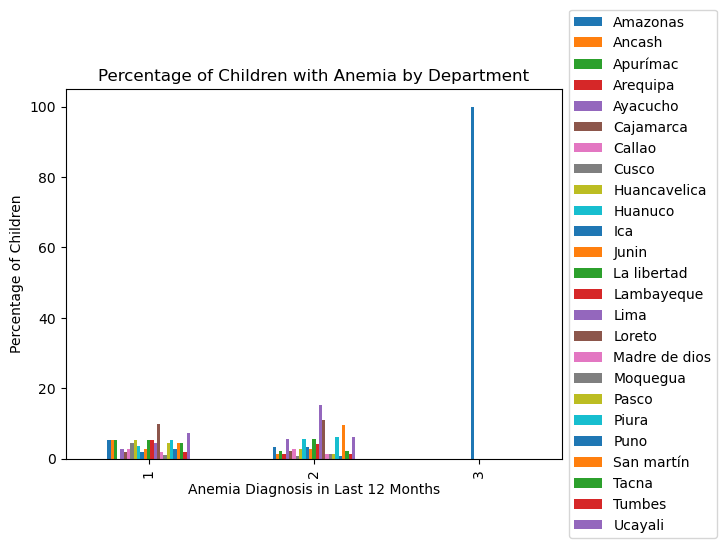

In [ ]:
# Department

department_counts_group.unstack().plot(kind='bar')
plt.title('Percentage of Children with Anemia by Department')
plt.xlabel('Anemia Diagnosis in Last 12 Months')
plt.ylabel('Percentage of Children')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

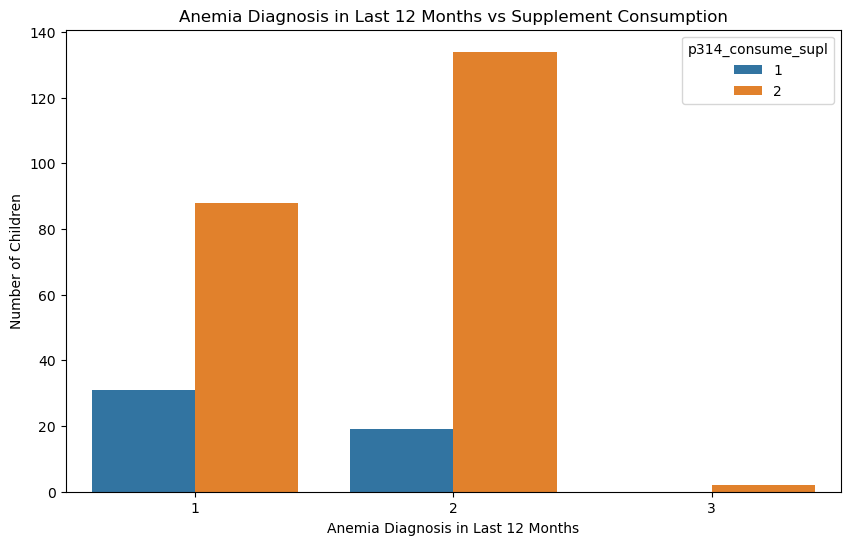

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_supplements_anemia, x='p307', hue='P314_CONSUME_SUPL'.lower())
plt.title('Anemia Diagnosis in Last 12 Months vs Supplement Consumption')
plt.xlabel('Anemia Diagnosis in Last 12 Months')
plt.ylabel('Number of Children')
plt.show()

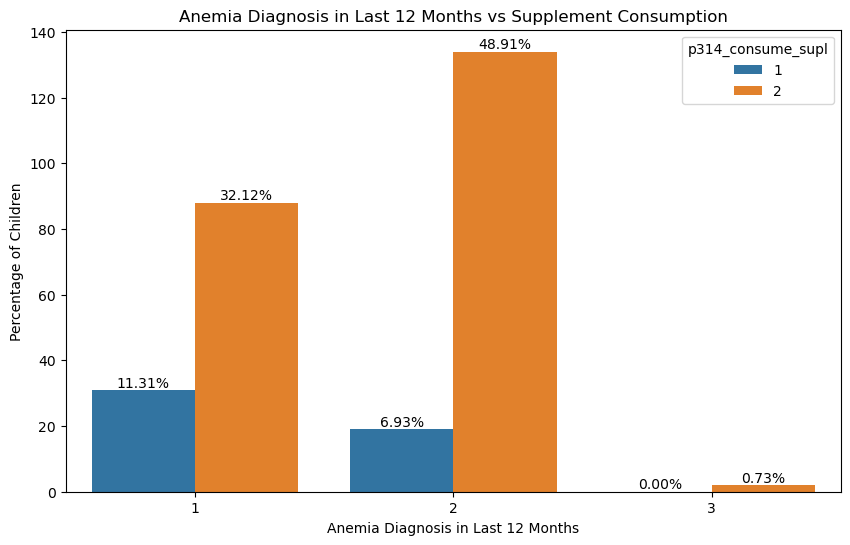

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=merged_supplements_anemia, x='p307', hue='P314_CONSUME_SUPL'.lower())

# Calcular los porcentajes
total = len(merged_supplements_anemia)  # Total de observaciones
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.title('Anemia Diagnosis in Last 12 Months vs Supplement Consumption')
plt.xlabel('Anemia Diagnosis in Last 12 Months')
plt.ylabel('Percentage of Children')

plt.show()


## Controles y BMI, sexo, pecho

### data integration

In [ ]:
query_control = 'select * from schema_nutri.cred_peso_talla'

In [ ]:
data_control = pd.read_sql_query(query_control, conn)

/var/folders/3b/5gkpc52946524dtx1sc5jtfc0000gn/T/ipykernel_16236/1259233299.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_control = pd.read_sql_query(query_control, conn)


In [ ]:
data_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   conglome       495 non-null    int64  
 1   vivienda       495 non-null    int64  
 2   id             495 non-null    object 
 3   p325_peso_nac  340 non-null    float64
 4   p327_peso_00   197 non-null    float64
 5   p327_talla_00  196 non-null    float64
 6   p327_peso_01   305 non-null    float64
 7   p327_talla_01  305 non-null    float64
 8   p327_peso_02   359 non-null    float64
 9   p327_talla_02  359 non-null    float64
 10  p327_peso_03   334 non-null    float64
 11  p327_talla_03  334 non-null    float64
 12  p327_peso_04   337 non-null    float64
 13  p327_talla_04  337 non-null    float64
 14  p327_peso_05   302 non-null    float64
 15  p327_talla_05  302 non-null    float64
 16  p327_peso_06   319 non-null    float64
 17  p327_talla_06  319 non-null    float64
 18  p327_peso_

<Axes: ylabel='p327_peso_00'>

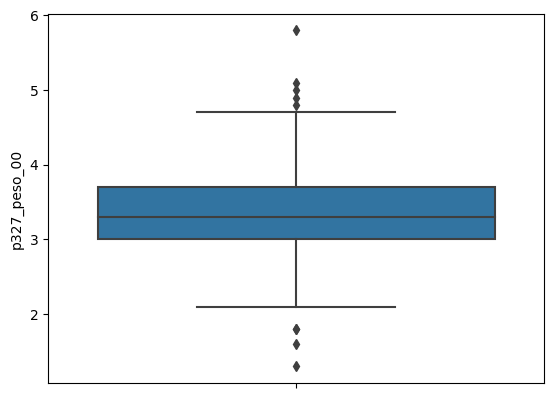

In [ ]:
sns.boxplot(y=data_control['p327_peso_00' ])

In [ ]:
data_control.p327_peso_00.describe()

count    197.000000
mean       3.378173
std        0.602614
min        1.300000
25%        3.000000
50%        3.300000
75%        3.700000
max        5.800000
Name: p327_peso_00, dtype: float64

In [ ]:
query_alimentacion = 'select * from schema_nutri.alimentacion_300'

In [ ]:
data_alimentacion = pd.read_sql_query(query_alimentacion, conn)

/var/folders/3b/5gkpc52946524dtx1sc5jtfc0000gn/T/ipykernel_16236/1517880279.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_alimentacion = pd.read_sql_query(query_alimentacion, conn)


In [ ]:
data_alimentacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   conglome             495 non-null    int64  
 1   vivienda             495 non-null    int64  
 2   id                   495 non-null    object 
 3   p367                 495 non-null    int64  
 4   p368_tiempo          489 non-null    float64
 5   p368_horas           214 non-null    float64
 6   p368_dias            48 non-null     float64
 7   p369                 491 non-null    float64
 8   p370_meses           237 non-null    float64
 9   p370_ns              0 non-null      object 
 10  p371                 495 non-null    int64  
 11  p371_agua            495 non-null    int64  
 12  p371_formula         495 non-null    int64  
 13  p371_leche_envasada  495 non-null    int64  
 14  p371_leche_vaca      495 non-null    int64  
 15  p371_jugo            495 non-null    int

In [ ]:
merged_data_scatter = pd.merge(data_alimentacion, data_control, on=['conglome', 'vivienda', 'id'], suffixes=('_alim', '_cred'))

In [ ]:
merged_data_scatter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 494
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   conglome             495 non-null    int64  
 1   vivienda             495 non-null    int64  
 2   id                   495 non-null    object 
 3   p367                 495 non-null    int64  
 4   p368_tiempo          489 non-null    float64
 5   p368_horas           214 non-null    float64
 6   p368_dias            48 non-null     float64
 7   p369                 491 non-null    float64
 8   p370_meses           237 non-null    float64
 9   p370_ns              0 non-null      object 
 10  p371                 495 non-null    int64  
 11  p371_agua            495 non-null    int64  
 12  p371_formula         495 non-null    int64  
 13  p371_leche_envasada  495 non-null    int64  
 14  p371_leche_vaca      495 non-null    int64  
 15  p371_jugo            495 non-null    int

### data cleaning 1

In [ ]:
merged_data_scatter['index_'] = merged_data_scatter['conglome'].astype(str) + '_' + merged_data_scatter['vivienda'].astype(str) + '_' + merged_data_scatter['id'].astype(float).astype(int).astype(str)
# identificador unico

In [ ]:
merged_data_scatter.columns

Index(['conglome', 'vivienda', 'id', 'Amamantado', 'p368_tiempo', 'p368_horas',
       'p368_dias', 'p369', 'p370_meses', 'p370_ns', 'p371', 'p371_agua',
       'p371_formula', 'p371_leche_envasada', 'p371_leche_vaca', 'p371_jugo',
       'p371_otro', 'p371_caldos', 'p371_ninguno', 'p325_peso_nac',
       'p327_peso_00', 'p327_talla_00', 'p327_peso_01', 'p327_talla_01',
       'p327_peso_02', 'p327_talla_02', 'p327_peso_03', 'p327_talla_03',
       'p327_peso_04', 'p327_talla_04', 'p327_peso_05', 'p327_talla_05',
       'p327_peso_06', 'p327_talla_06', 'p327_peso_07', 'p327_talla_07',
       'p327_peso_08', 'p327_talla_08', 'p327_peso_09', 'p327_talla_09',
       'p327_peso_10', 'p327_talla_10', 'p331', 'p332', 'p333', 'p334',
       'index_'],
      dtype='object')

In [ ]:
merged_data_scatter.rename(columns={
    'p367': 'Amamantado',
    
}, inplace=True)

In [ ]:
merged_data_scatter.columns

Index(['conglome', 'vivienda', 'id', 'Amamantado', 'p368_tiempo', 'p368_horas',
       'p368_dias', 'p369', 'p370_meses', 'p370_ns', 'p371', 'p371_agua',
       'p371_formula', 'p371_leche_envasada', 'p371_leche_vaca', 'p371_jugo',
       'p371_otro', 'p371_caldos', 'p371_ninguno', 'p325_peso_nac',
       'p327_peso_00', 'p327_talla_00', 'p327_peso_01', 'p327_talla_01',
       'p327_peso_02', 'p327_talla_02', 'p327_peso_03', 'p327_talla_03',
       'p327_peso_04', 'p327_talla_04', 'p327_peso_05', 'p327_talla_05',
       'p327_peso_06', 'p327_talla_06', 'p327_peso_07', 'p327_talla_07',
       'p327_peso_08', 'p327_talla_08', 'p327_peso_09', 'p327_talla_09',
       'p327_peso_10', 'p327_talla_10', 'p331', 'p332', 'p333', 'p334',
       'index_'],
      dtype='object')

### data cleaning 2

In [ ]:
needed_columns = ['index_', 'Amamantado'] + [f'p327_peso_0{i}' for i in range(8)] +  [f'p327_talla_0{i}' for i in range(8)]

In [ ]:
cleaned_data = merged_data_scatter[needed_columns]
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 494
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index_         495 non-null    object 
 1   Amamantado     495 non-null    int64  
 2   p327_peso_00   197 non-null    float64
 3   p327_peso_01   305 non-null    float64
 4   p327_peso_02   359 non-null    float64
 5   p327_peso_03   334 non-null    float64
 6   p327_peso_04   337 non-null    float64
 7   p327_peso_05   302 non-null    float64
 8   p327_peso_06   319 non-null    float64
 9   p327_peso_07   296 non-null    float64
 10  p327_talla_00  196 non-null    float64
 11  p327_talla_01  305 non-null    float64
 12  p327_talla_02  359 non-null    float64
 13  p327_talla_03  334 non-null    float64
 14  p327_talla_04  337 non-null    float64
 15  p327_talla_05  302 non-null    float64
 16  p327_talla_06  319 non-null    float64
 17  p327_talla_07  296 non-null    float64
dtypes: float64

In [ ]:

cleaned_data.index_.value_counts()

9943_5_99      2
8671_36_99     2
5345_4_3       1
6298_107_3     1
6597_166_5     1
              ..
7615_43_5      1
7601_84_4      1
7582_45_4      1
7574_69_6      1
5155_213_99    1
Name: index_, Length: 493, dtype: int64

In [ ]:
cleaned_data = cleaned_data.loc[~cleaned_data.index_.duplicated(keep='first')]



In [ ]:
cleaned_data.Amamantado.value_counts()

1    489
2      4
Name: Amamantado, dtype: int64

In [ ]:
cleaned_data.Amamantado = cleaned_data.Amamantado.replace({1: 'Si', 2: 'No'})

### data cleaning 3


In [ ]:
cleaned

In [ ]:
isMV = cleaned_data.p327_peso_00.isna()
isMV



0      False
1      False
2       True
3      False
4       True
       ...  
490    False
491     True
492    False
493    False
494     True
Name: p327_peso_00, Length: 493, dtype: bool

In [ ]:
from scipy.stats import ttest_ind
def diagnosticoMV_numerical(df, atributo, isMV):

  labelsDic = {True:'CON Valores Faltantes',False:'SIN Valores Faltantes'}

  #Método Visual
  labels=[]
  box_sr = pd.Series('',index = isMV.unique())
  for poss in isMV.unique():
    # Filtra a los indices que son iguales a poss
    BM = isMV == poss
    # Agrega a box_sr
    box_sr[poss] = df[BM][atributo].dropna()
    labels.append(labelsDic[poss])

  
  plt.boxplot(box_sr,vert=False)
  plt.yticks([1,2],labels)
  plt.xlabel(atributo)
  plt.show()

  #Método Estadístico
  grupoCMV = df[isMV][atributo].dropna()
  grupoSMV = df[~isMV][atributo].dropna()
  pvalue = ttest_ind(grupoCMV,grupoSMV).pvalue

  print('p-value es: {}'.format(pvalue))


  

Diagnóstico para datos faltantes en p327_peso_01:


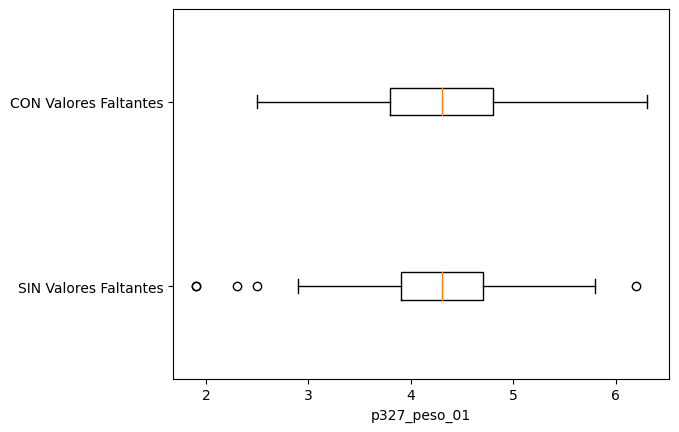

p-value es: 0.9099282913951194
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_02:


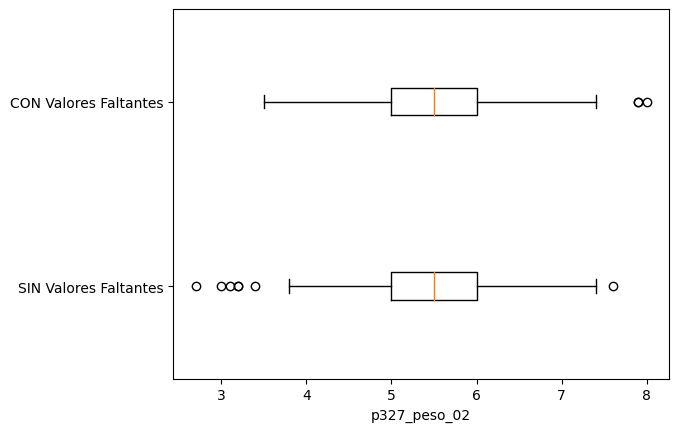

p-value es: 0.3859259692287528
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_03:


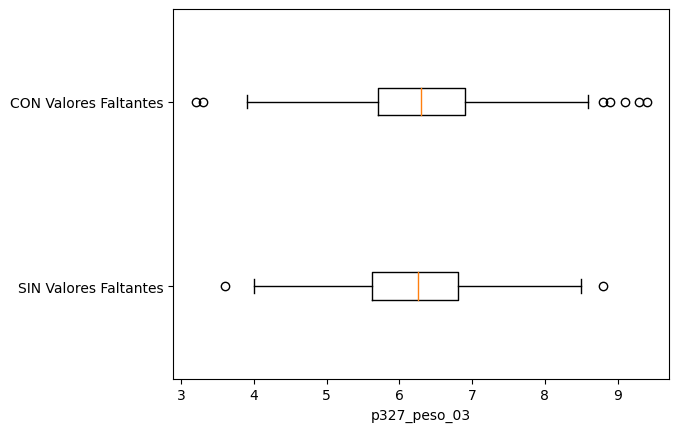

p-value es: 0.4381330485761519
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_04:


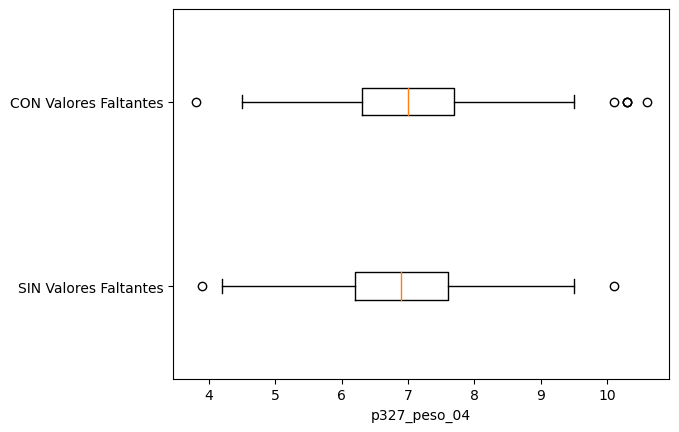

p-value es: 0.09876998263841118
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_05:


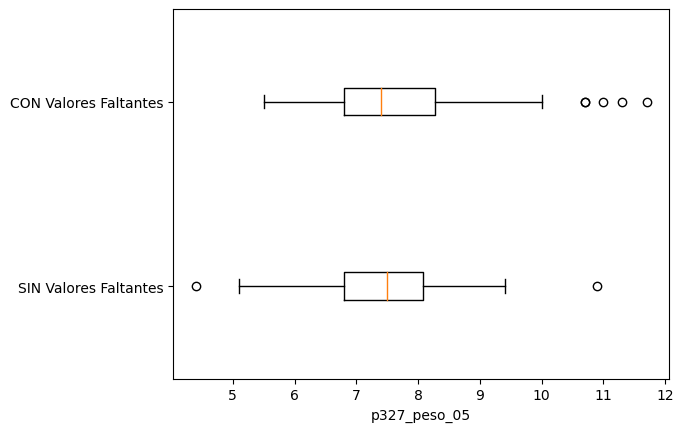

p-value es: 0.20076168757087318
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_06:


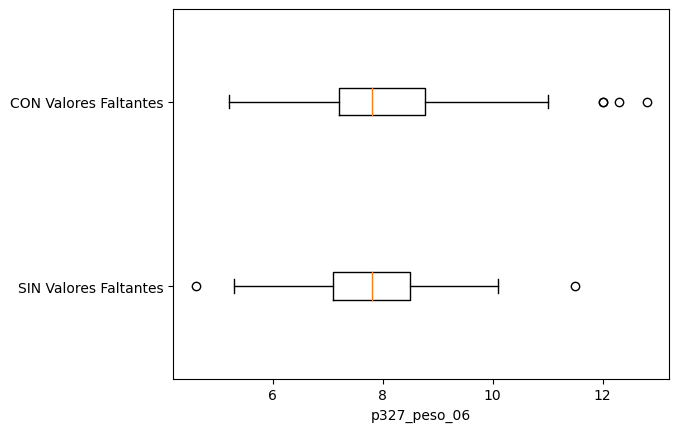

p-value es: 0.02719357728873954
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_07:


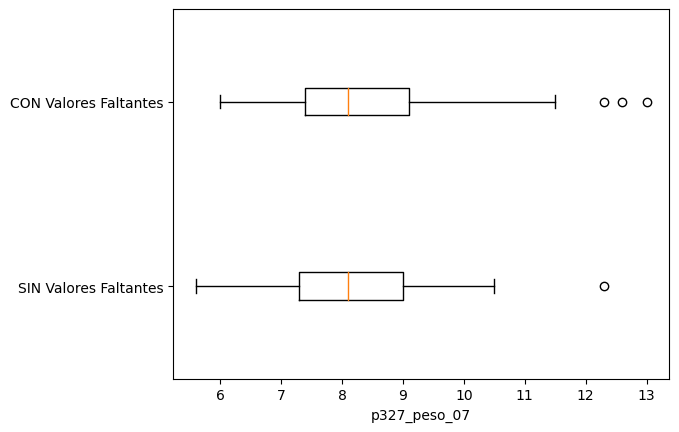

p-value es: 0.038966291824572494
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_00:


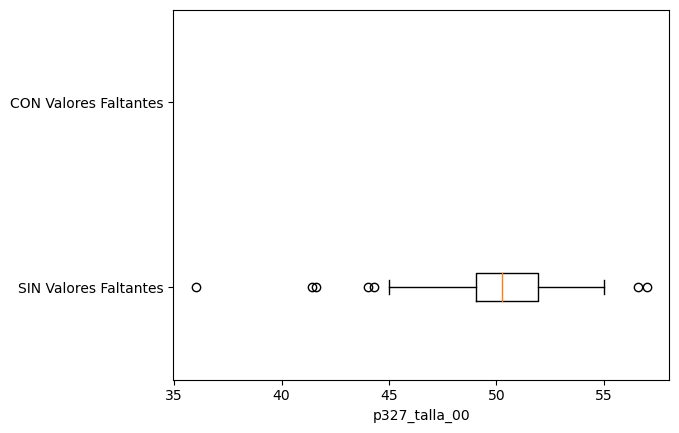

p-value es: nan
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_01:


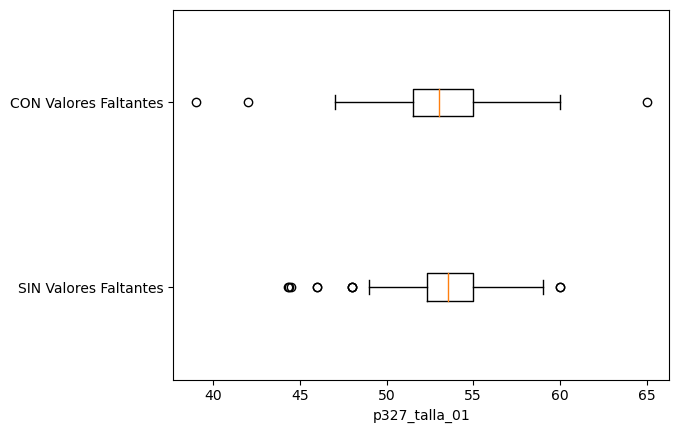

p-value es: 0.3862537308106977
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_02:


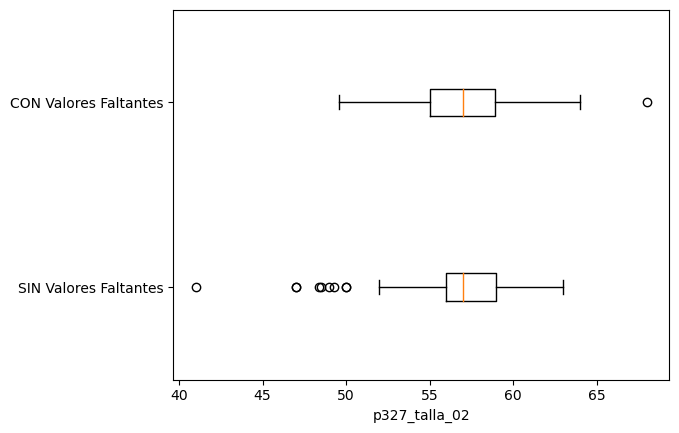

p-value es: 0.38696747111536156
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_03:


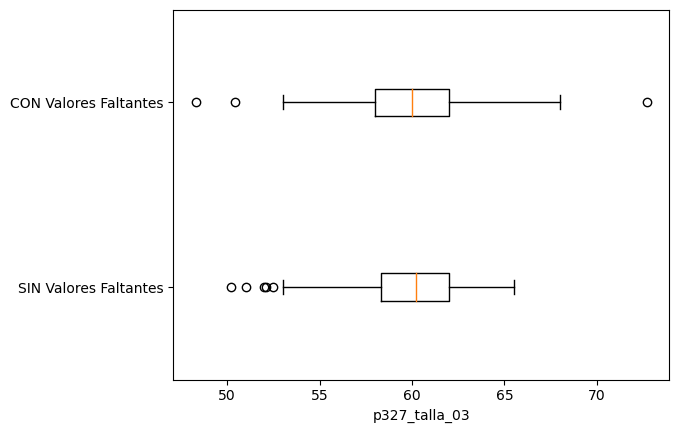

p-value es: 0.8310816199157163
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_04:


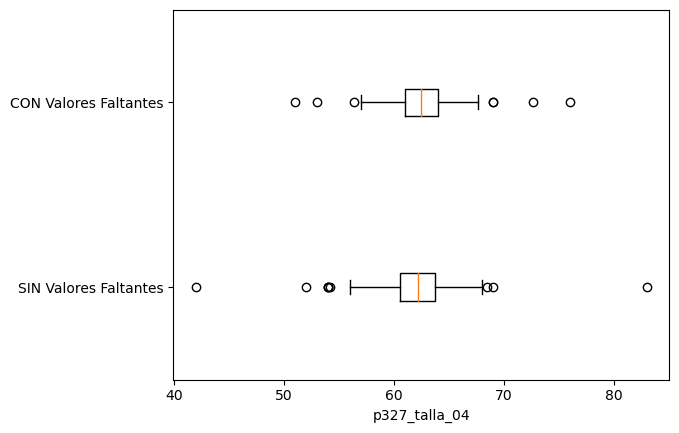

p-value es: 0.21131464146578705
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_05:


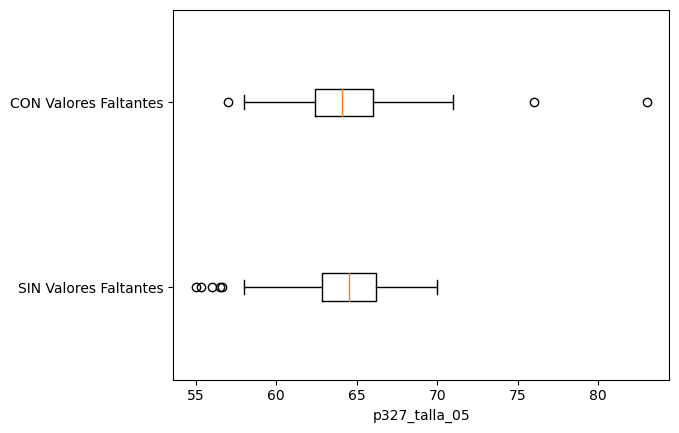

p-value es: 0.7682646755189413
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_06:


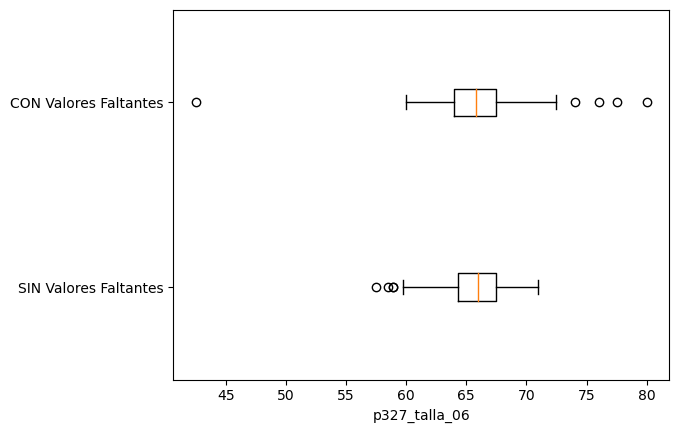

p-value es: 0.758678222787809
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_07:


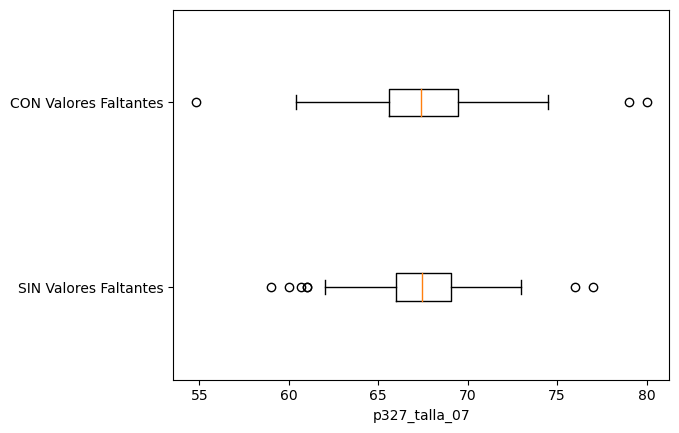

p-value es: 0.6253650293194959
- - - - - - - - - - - - - - - - - - - - - - - 


In [ ]:
numAttr = [f'p327_peso_0{i}' for i in range(1,8)] +  [f'p327_talla_0{i}' for i in range(8)]

isMV = cleaned_data.p327_peso_00.isna()
for atributo in numAttr:
    print('Diagnóstico para datos faltantes en {}:'.format(atributo))
    diagnosticoMV_numerical(cleaned_data,atributo,isMV)
    print('- - - - - - - - - - - - - - - - - - - - - - - ')

**categorico**


In [ ]:
from scipy.stats import chi2_contingency 
def diagnosticoMV_categorico(df, atributo, isMV):
  labelsDic = {True:'CON Valores Faltantes',False:'SIN Valores Faltantes'}
  plt.figure(figsize=(10,4))
  for i,poss in enumerate(isMV.unique()):
    plt.subplot(1,2,i+1)
    BM = isMV == poss
    df[BM][atributo].value_counts().plot.bar()
    plt.title(labelsDic[i])
  plt.show()

  contigency_table = pd.crosstab(isMV,df[atributo])
  p_value = chi2_contingency(contigency_table)[1]
    
  print('p-value of Chi_squared test: {}'.format(p_value)) 

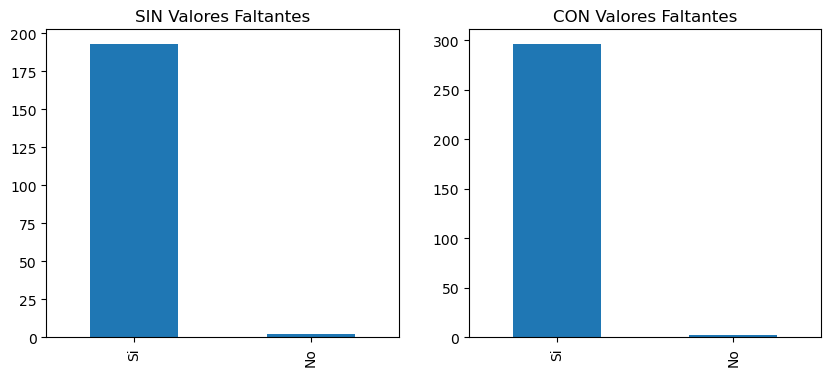

p-value of Chi_squared test: 1.0


In [ ]:
diagnosticoMV_categorico(cleaned_data, "Amamantado", isMV)

MCR